In [ ]:
import pandas as pd
import numpy as np

In [ ]:
path_for_task = '/content/data_lab_1.csv'
df = pd.read_csv(path_for_task)

df.head()

,price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,balcony,airports_distance,centers_distance,parks_nearest,ponds_nearest
0,13000000.0,108.0,3,2.70,16.0,51.0,8,False,25.0,NaN,18863.0,16028.0,482.0,755.0
1,3350000.0,40.4,1,NaN,11.0,18.6,1,False,11.0,2.0,12817.0,18603.0,NaN,NaN
2,5196000.0,56.0,2,NaN,5.0,34.3,4,False,8.3,0.0,21741.0,13933.0,90.0,574.0
3,64900000.0,159.0,3,NaN,14.0,NaN,9,False,NaN,0.0,28098.0,6800.0,84.0,234.0
4,10000000.0,100.0,2,3.03,14.0,32.0,13,False,41.0,NaN,31856.0,8098.0,112.0,48.0


### Проверка соответствия типов данных и заполнение пропусков


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              23699 non-null  float64
 1   total_area         23699 non-null  float64
 2   rooms              23699 non-null  int64  
 3   ceiling_height     14504 non-null  float64
 4   floors_total       23613 non-null  float64
 5   living_area        21796 non-null  float64
 6   floor              23699 non-null  int64  
 7   studio             23699 non-null  bool   
 8   kitchen_area       21421 non-null  float64
 9   balcony            12180 non-null  float64
 10  airports_distance  18157 non-null  float64
 11  centers_distance   18180 non-null  float64
 12  parks_nearest      8079 non-null   float64
 13  ponds_nearest      9110 non-null   float64
dtypes: bool(1), float64(11), int64(2)
memory usage: 2.4 MB


In [ ]:
df.head()

,price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,balcony,airports_distance,centers_distance,parks_nearest,ponds_nearest
0,13000000.0,108.0,3,2.70,16.0,51.0,8,False,25.0,NaN,18863.0,16028.0,482.0,755.0
1,3350000.0,40.4,1,NaN,11.0,18.6,1,False,11.0,2.0,12817.0,18603.0,NaN,NaN
2,5196000.0,56.0,2,NaN,5.0,34.3,4,False,8.3,0.0,21741.0,13933.0,90.0,574.0
3,64900000.0,159.0,3,NaN,14.0,NaN,9,False,NaN,0.0,28098.0,6800.0,84.0,234.0
4,10000000.0,100.0,2,3.03,14.0,32.0,13,False,41.0,NaN,31856.0,8098.0,112.0,48.0


Посмотрим наглядно, пропущен ли элемент или нет

In [ ]:
df.isna()

,price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,balcony,airports_distance,centers_distance,parks_nearest,ponds_nearest
0,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False,True,True
2,False,False,False,True,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,True,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,False,False,False,False,False,False,False,False,False,True,False,False,False,False
23695,False,False,False,True,False,False,False,False,False,True,True,True,True,True
23696,False,False,False,True,False,False,False,False,True,True,True,True,True,True
23697,False,False,False,False,False,True,False,False,False,False,False,False,False,False


Выведем количество пропущенных значений в каждом из столбцов

In [ ]:
df.isna().sum(axis=0)

,0
price,0
total_area,0
rooms,0
ceiling_height,9195
floors_total,86
living_area,1903
floor,0
studio,0
kitchen_area,2278
balcony,11519


Возьмем признак balcony и выведем, сколько раз встречаются разные значения в этом столбце

In [ ]:
df['balcony'].value_counts()

,count
balcony,
1.0,4195
0.0,3758
2.0,3659
5.0,304
4.0,183
3.0,81


Сделаем вид, как-будто существуют квартиры с 5 балконами.

В колонке с балконами логичко поставить 0, где не заполнены ячейки

In [ ]:
df['balcony'] = df['balcony'].fillna(0)

In [ ]:
df.isna().sum(axis=0)

,0
price,0
total_area,0
rooms,0
ceiling_height,9195
floors_total,86
living_area,1903
floor,0
studio,0
kitchen_area,2278
balcony,0


Для остальных признаков построим гистограмму

In [ ]:
import matplotlib.pyplot as plt

<BarContainer object of 14 artists>

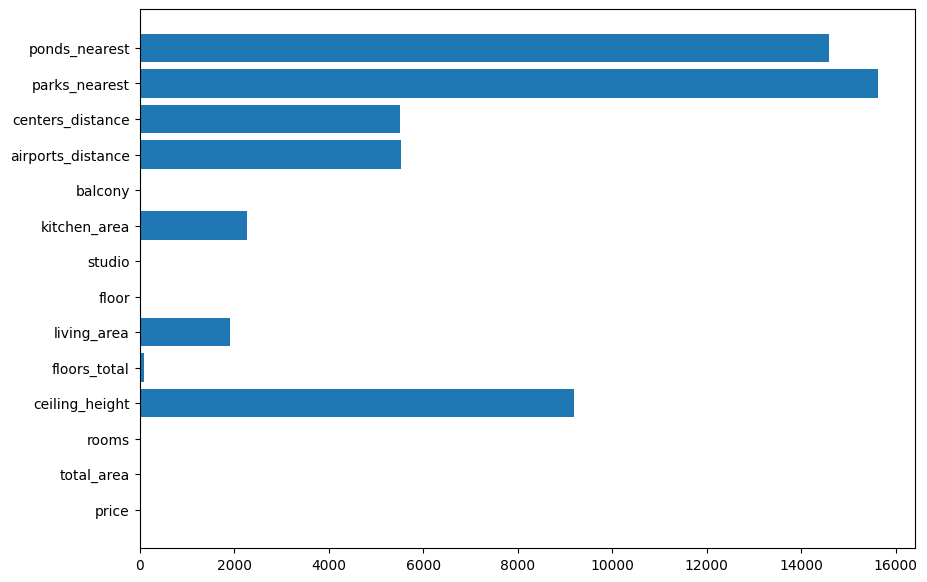

In [ ]:
data = df.isna().sum()

plt.figure(figsize=(10,7))

plt.barh(data.index, data.values)

In [ ]:
features = ['parks_nearest', 'ponds_nearest', 'ceiling_height', 'centers_distance', 'airports_distance', 'kitchen_area', 'living_area', 'floors_total']
for feature in features:
  na_percentage = round((df[feature].isna().sum() / len(df[feature])) * 100, 3)
  print(f'{na_percentage} % пропущенных данных у признакак {feature}')

65.91 % пропущенных данных у признакак parks_nearest
61.56 % пропущенных данных у признакак ponds_nearest
38.799 % пропущенных данных у признакак ceiling_height
23.288 % пропущенных данных у признакак centers_distance
23.385 % пропущенных данных у признакак airports_distance
9.612 % пропущенных данных у признакак kitchen_area
8.03 % пропущенных данных у признакак living_area
0.363 % пропущенных данных у признакак floors_total


Видим, какие признаки имеют наибольшее количество пропусков

Судя по большому проценту отсутствующих данных, было принято решение удалить признаки **parks_nearest**, **ponds_nearest** и **ceiling_height**.

In [ ]:
df = df.drop(columns=['parks_nearest', 'ponds_nearest', 'ceiling_height'])

Попробуем заполнить пропуски у остальных колонок.

Для этого воспользуемся медианой или средним арифметическим. Рассмотрим гистограммы распределений для каждого признака.

**centers_distance**

In [ ]:
mean_centers_distance = np.mean(df['centers_distance'].dropna().values)
median_centers_distance = np.quantile(df['centers_distance'].dropna().values,q=0.5)
print(f"Среднее = {mean_centers_distance}")
print(f"Медиана = {median_centers_distance}")

Среднее = 14191.277832783278
Медиана = 13098.5


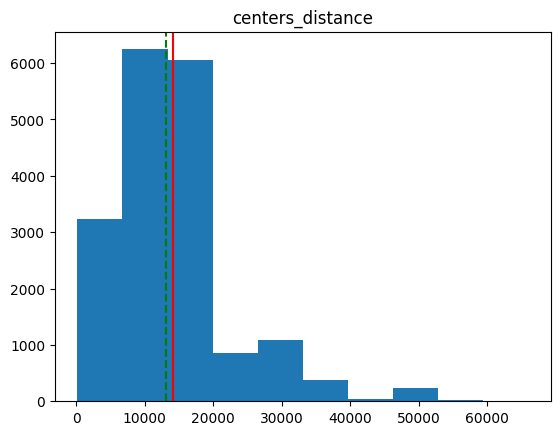

In [ ]:
plt.hist(df['centers_distance'])

plt.axvline(x=mean_centers_distance, color='r', linestyle = '-', label='mean')
plt.axvline(x=median_centers_distance, color='g', linestyle = '--', label='median')
plt.title('centers_distance')
plt.show()

В случае с расстоянием до центра видим правостороннию ассиметрию. Среднее больше, чем медиана. Здесь будем использовать медиану.

**airports_distance**


In [ ]:
mean_airports_distance = np.mean(df['airports_distance'].dropna().values)
median_airports_distance = np.quantile(df['airports_distance'].dropna().values,q=0.5)
print(f"Среднее = {mean_airports_distance}")
print(f"Медиана = {median_airports_distance}")

Среднее = 28793.67219254282
Медиана = 26726.0


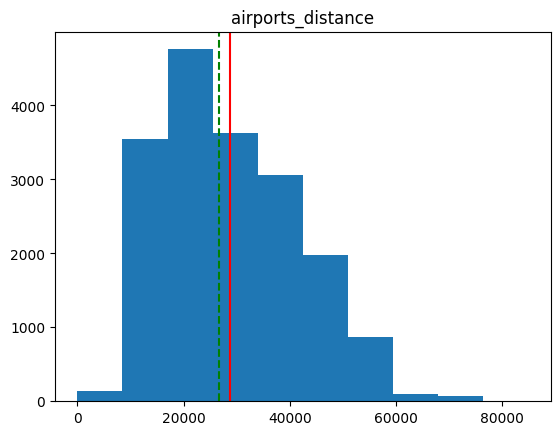

In [ ]:
plt.hist(df['airports_distance'])

plt.axvline(x=mean_airports_distance, color='r', linestyle = '-', label='mean')
plt.axvline(x=median_airports_distance, color='g', linestyle = '--', label='median')
plt.title('airports_distance')
plt.show()

В расстоянии до аэропорта видим также правый хвост, но он не такой выраженный как предыдущий. В целях безопасности будем также использовать медиану.

**kitchen_area**

In [ ]:
mean_kitchen_area = np.mean(df['kitchen_area'].dropna().values)
median_kitchen_area = np.quantile(df['kitchen_area'].dropna().values,q=0.5)
print(f"Среднее = {mean_kitchen_area}")
print(f"Медиана = {median_kitchen_area}")

Среднее = 10.569807198543485
Медиана = 9.1


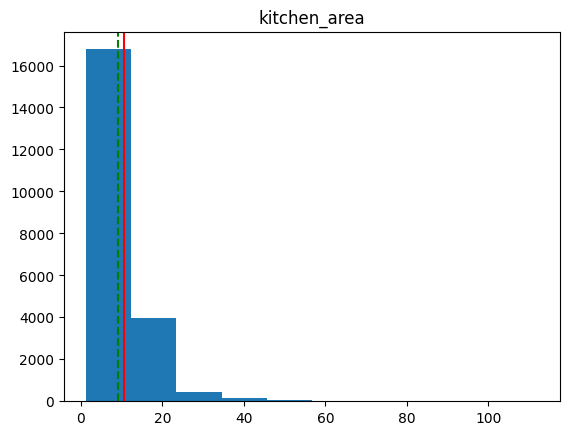

In [ ]:
plt.hist(df['kitchen_area'])

plt.axvline(x=mean_kitchen_area, color='r', linestyle = '-', label='mean')
plt.axvline(x=median_kitchen_area, color='g', linestyle = '--', label='median')
plt.title('kitchen_area')
plt.show()

Для kitchen_area используем медиану

**living_area**

In [ ]:
mean_living_area = np.mean(df['living_area'].dropna().values)
median_living_area = np.quantile(df['living_area'].dropna().values,q=0.5)
print(f"Среднее = {mean_living_area}")
print(f"Медиана = {median_living_area}")

Среднее = 34.457852427601395
Медиана = 30.0


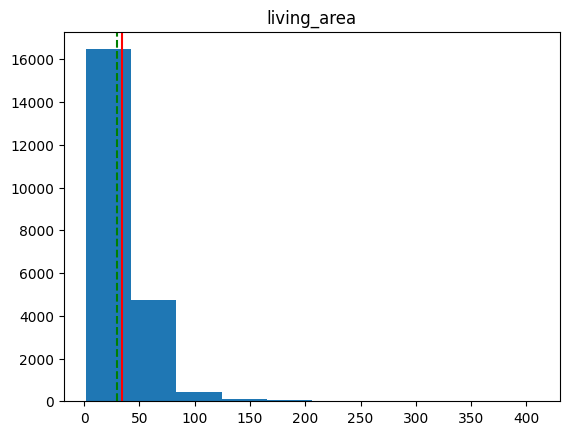

In [ ]:
plt.hist(df['living_area'])

plt.axvline(x=mean_living_area, color='r', linestyle = '-', label='mean')
plt.axvline(x=median_living_area, color='g', linestyle = '--', label='median')
plt.title('living_area')
plt.show()

Как и ранее используем медиану

**floors_total**

In [ ]:
mean_floors_total = np.mean(df['floors_total'].dropna().values)
median_floors_total = np.quantile(df['floors_total'].dropna().values,q=0.5)
print(f"Среднее = {mean_floors_total}")
print(f"Медиана = {median_floors_total}")

Среднее = 10.67382374115953
Медиана = 9.0


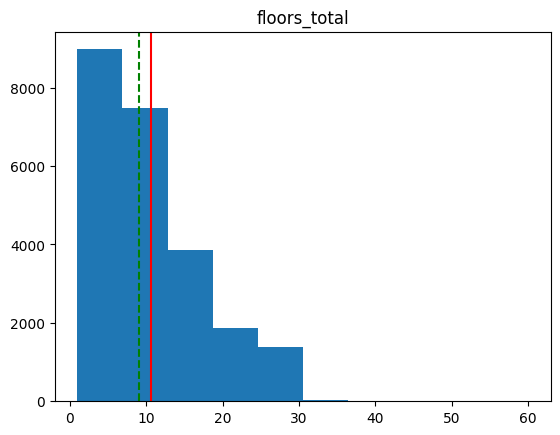

In [ ]:
plt.hist(df['floors_total'])

plt.axvline(x=mean_floors_total, color='r', linestyle = '-', label='mean')
plt.axvline(x=median_floors_total, color='g', linestyle = '--', label='median')
plt.title('floors_total')
plt.show()

Используем медиану.

Для всех признаков выбираем заполнение медианой.

In [ ]:
features = ['centers_distance', 'airports_distance', 'living_area', 'floors_total', 'kitchen_area']
for feature in features:
  df[feature] = df[feature].fillna(df[feature].quantile(0.5))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              23699 non-null  float64
 1   total_area         23699 non-null  float64
 2   rooms              23699 non-null  int64  
 3   floors_total       23699 non-null  float64
 4   living_area        23699 non-null  float64
 5   floor              23699 non-null  int64  
 6   studio             23699 non-null  bool   
 7   kitchen_area       23699 non-null  float64
 8   balcony            23699 non-null  float64
 9   airports_distance  23699 non-null  float64
 10  centers_distance   23699 non-null  float64
dtypes: bool(1), float64(8), int64(2)
memory usage: 1.8 MB


Заметим, что floors_total (количество этажей в доме) имеет тип float64, а должен int64. Также balcony

In [ ]:
df['floors_total'] = df['floors_total'].astype(int)
df['balcony'] = df['balcony'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              23699 non-null  float64
 1   total_area         23699 non-null  float64
 2   rooms              23699 non-null  int64  
 3   floors_total       23699 non-null  int64  
 4   living_area        23699 non-null  float64
 5   floor              23699 non-null  int64  
 6   studio             23699 non-null  bool   
 7   kitchen_area       23699 non-null  float64
 8   balcony            23699 non-null  int64  
 9   airports_distance  23699 non-null  float64
 10  centers_distance   23699 non-null  float64
dtypes: bool(1), float64(6), int64(4)
memory usage: 1.8 MB


### Обработка дубликатов

Посмотрим, сколько всего дубликатов

In [ ]:
duplicates = df.duplicated().sum()
print(f'Количество дубликатов: {duplicates}')

Количество дубликатов: 5


In [ ]:
duplicates_all = df[df.duplicated(keep=False)]
duplicates_all

,price,total_area,rooms,floors_total,living_area,floor,studio,kitchen_area,balcony,airports_distance,centers_distance
7668,4150000.0,45.0,1,16,20.0,10,False,12.0,2,15331.0,14127.0
9661,2533531.0,42.5,1,18,19.8,7,False,9.1,0,26726.0,13098.5
9886,2533531.0,42.5,1,18,19.8,7,False,9.1,0,26726.0,13098.5
13034,2350000.0,42.0,4,5,30.0,2,False,9.1,0,26726.0,13098.5
14488,2350000.0,33.0,1,5,19.0,4,False,6.0,0,26726.0,13098.5
16197,2350000.0,33.0,1,5,19.0,4,False,6.0,0,26726.0,13098.5
16714,1950000.0,33.7,1,7,18.0,6,False,8.0,0,26726.0,13098.5
17994,4150000.0,45.0,1,16,20.0,10,False,12.0,2,15331.0,14127.0
20102,2350000.0,42.0,4,5,30.0,2,False,9.1,0,26726.0,13098.5
22696,1950000.0,33.7,1,7,18.0,6,False,8.0,0,26726.0,13098.5


Произведем очистку

In [ ]:
df = df.drop_duplicates()

### Обработка аномальных значений и выбросов

Проверим, может ли быть такое, что площадь кухни и жилой площади больше всей площади и удалим, если есть такие строчки

In [ ]:
fail = df['living_area'] + df['kitchen_area'] > df['total_area']
count = fail.sum()
df.drop(df[fail].index, inplace=True)
print(count)

741


In [ ]:
df

,price,total_area,rooms,floors_total,living_area,floor,studio,kitchen_area,balcony,airports_distance,centers_distance
0,13000000.0,108.00,3,16,51.0,8,False,25.00,0,18863.0,16028.0
1,3350000.0,40.40,1,11,18.6,1,False,11.00,2,12817.0,18603.0
2,5196000.0,56.00,2,5,34.3,4,False,8.30,0,21741.0,13933.0
3,64900000.0,159.00,3,14,30.0,9,False,9.10,0,28098.0,6800.0
4,10000000.0,100.00,2,14,32.0,13,False,41.00,0,31856.0,8098.0
...,...,...,...,...,...,...,...,...,...,...,...
23694,9700000.0,133.81,3,5,73.3,3,False,13.83,0,24665.0,4232.0
23695,3100000.0,59.00,3,5,38.0,4,False,8.50,0,26726.0,13098.5
23696,2500000.0,56.70,2,3,29.7,1,False,9.10,0,26726.0,13098.5
23697,11475000.0,76.75,2,17,30.0,12,False,23.30,2,39140.0,10364.0


Чтобы определить выбросы, построим боксплоты. Для начала нам нужно посчитать первый и третий квартиль. Далее найдем размах и определим границы выбросов

In [ ]:
import seaborn as sns

In [ ]:
def iqr(df, columns):
  df_cleaned = df.copy()
  for col in columns:
    first_quartile = df_cleaned[col].quantile(0.25)
    third_quartile = df_cleaned[col].quantile(0.75)
    IQR = third_quartile - first_quartile
    lower_bound = first_quartile - 1.5 * IQR
    upper_bound = third_quartile + 1.5 * IQR
    df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

    return df_cleaned

In [ ]:
n_features = ['total_area', 'rooms', 'floors_total', 'living_area', 'floor', 'kitchen_area', 'airports_distance', 'centers_distance']
df_cleaned_iqr = iqr(df, n_features)
print(f"Количество строк до удаления выбросов: {len(df)}")
print(f"Количество строк после удаления выбросов: {len(df_cleaned_iqr)}")

Количество строк до удаления выбросов: 22953
Количество строк после удаления выбросов: 21674


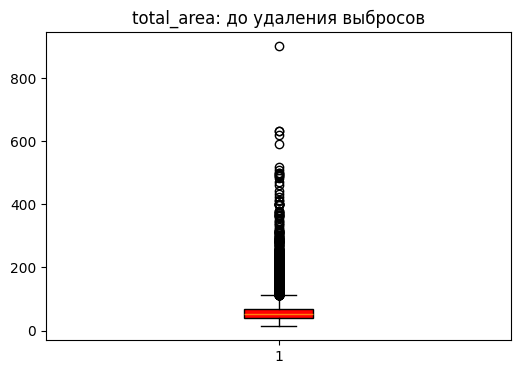

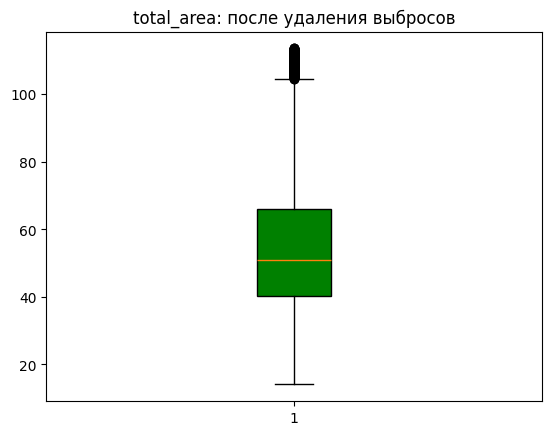

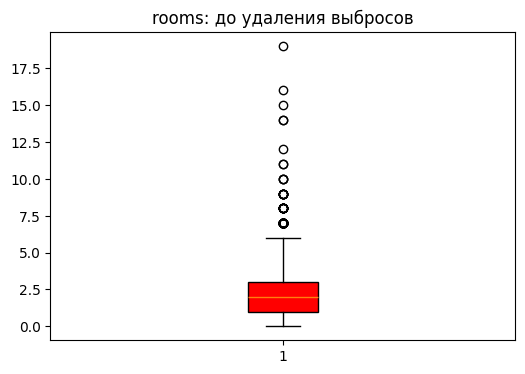

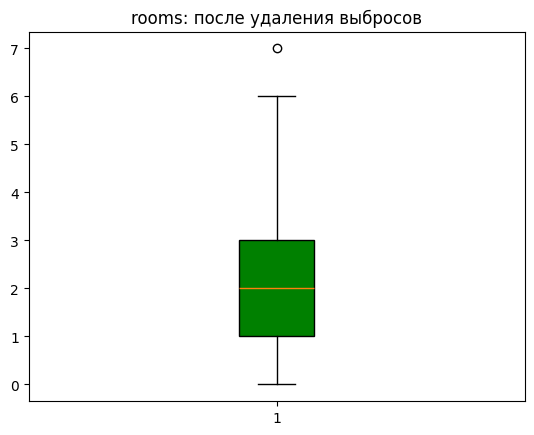

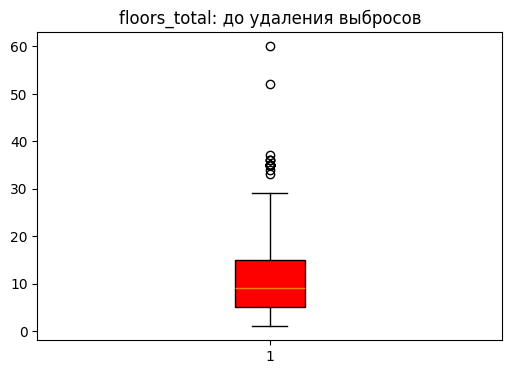

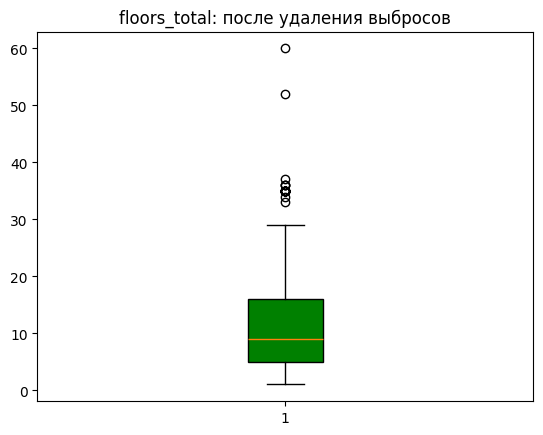

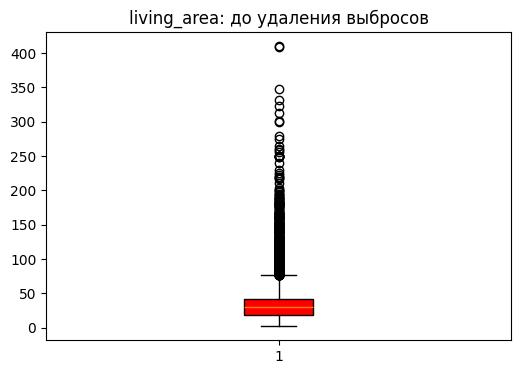

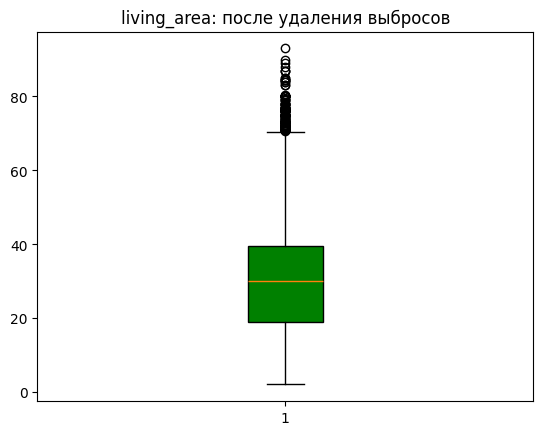

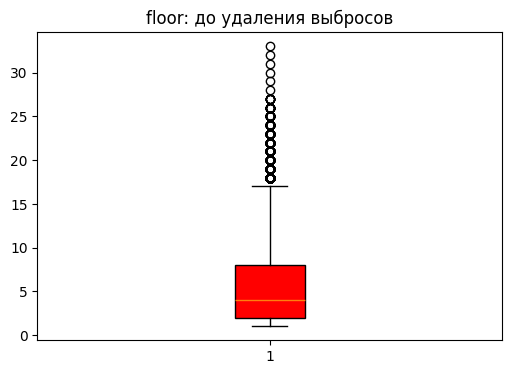

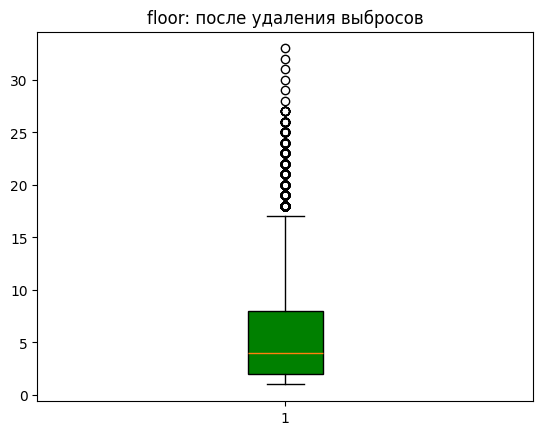

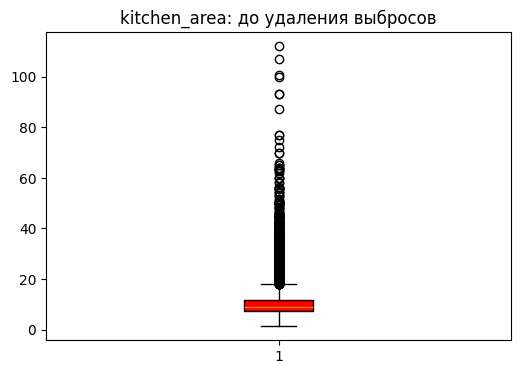

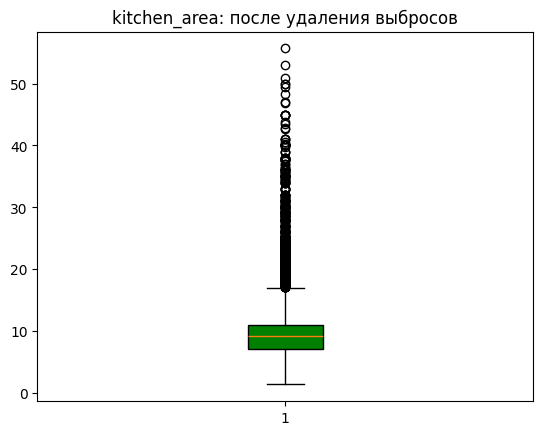

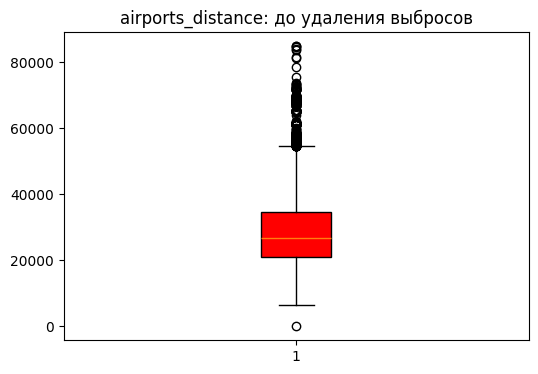

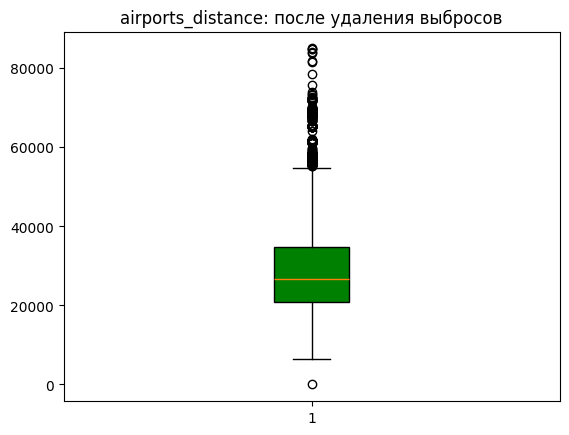

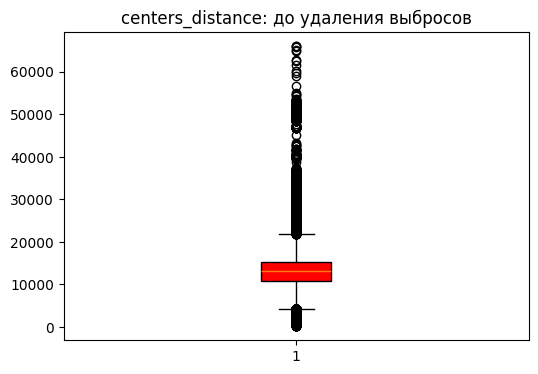

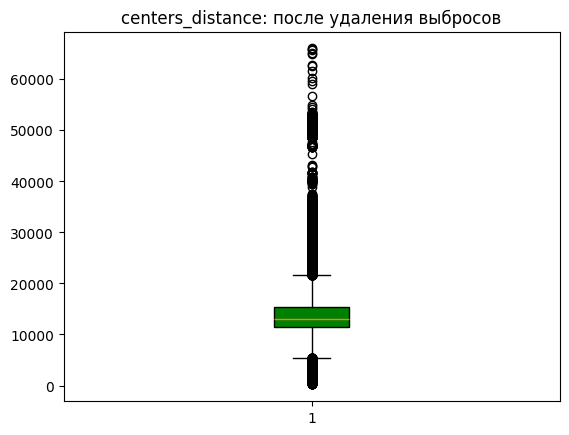

In [ ]:
for f in n_features:
    plt.figure(figsize=(6, 4))
    # до удаления выбросов
    plt.boxplot(df[f], patch_artist=True, boxprops=dict(facecolor="red"), showfliers=True)
    plt.title(f"{f}: до удаления выбросов")
    plt.show()
    # после удаления выбросов
    plt.boxplot(df_cleaned_iqr[f], patch_artist=True, boxprops=dict(facecolor="green"), showfliers=True)
    plt.title(f"{f}: после удаления выбросов")
    plt.show()


### Закодировать категориальные признаки

In [ ]:
df.head(10)

,price,total_area,rooms,floors_total,living_area,floor,studio,kitchen_area,balcony,airports_distance,centers_distance
0,13000000.0,108.00,3,16,51.00,8,False,25.00,0,18863.0,16028.0
1,3350000.0,40.40,1,11,18.60,1,False,11.00,2,12817.0,18603.0
2,5196000.0,56.00,2,5,34.30,4,False,8.30,0,21741.0,13933.0
3,64900000.0,159.00,3,14,30.00,9,False,9.10,0,28098.0,6800.0
4,10000000.0,100.00,2,14,32.00,13,False,41.00,0,31856.0,8098.0
5,2890000.0,30.40,1,12,14.40,5,False,9.10,0,26726.0,13098.5
6,3700000.0,37.30,1,26,10.60,6,False,14.40,1,52996.0,19143.0
7,7915000.0,71.60,2,24,30.00,22,False,18.90,2,23982.0,11634.0
8,2900000.0,33.16,1,27,15.43,26,False,8.81,0,26726.0,13098.5
9,5400000.0,61.00,3,9,43.60,7,False,6.50,2,50898.0,15008.0


Видим бинарный категориальный признак studio. Изменим тип, чтобы он стал числовым.

In [ ]:
df['studio'] = df['studio'].astype(int)
df

,price,total_area,rooms,floors_total,living_area,floor,studio,kitchen_area,balcony,airports_distance,centers_distance
0,13000000.0,108.00,3,16,51.0,8,0,25.00,0,18863.0,16028.0
1,3350000.0,40.40,1,11,18.6,1,0,11.00,2,12817.0,18603.0
2,5196000.0,56.00,2,5,34.3,4,0,8.30,0,21741.0,13933.0
3,64900000.0,159.00,3,14,30.0,9,0,9.10,0,28098.0,6800.0
4,10000000.0,100.00,2,14,32.0,13,0,41.00,0,31856.0,8098.0
...,...,...,...,...,...,...,...,...,...,...,...
23694,9700000.0,133.81,3,5,73.3,3,0,13.83,0,24665.0,4232.0
23695,3100000.0,59.00,3,5,38.0,4,0,8.50,0,26726.0,13098.5
23696,2500000.0,56.70,2,3,29.7,1,0,9.10,0,26726.0,13098.5
23697,11475000.0,76.75,2,17,30.0,12,0,23.30,2,39140.0,10364.0


### Скалировать / Нормализовать данные

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
df_categorical = df_cleaned_iqr.drop(columns=n_features)
df_numeric = df_cleaned_iqr[n_features]
scaler_standard = StandardScaler()
df_scaled_standard = pd.DataFrame(scaler_standard.fit_transform(df_numeric), columns=n_features, index=df_numeric.index)

In [ ]:
df_final = pd.concat([df_scaled_standard, df_categorical], axis=1)
df_final.head()
len(df_final)

21674

In [ ]:
df = df_final
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21674 entries, 0 to 23698
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   total_area         21674 non-null  float64
 1   rooms              21674 non-null  float64
 2   floors_total       21674 non-null  float64
 3   living_area        21674 non-null  float64
 4   floor              21674 non-null  float64
 5   kitchen_area       21674 non-null  float64
 6   airports_distance  21674 non-null  float64
 7   centers_distance   21674 non-null  float64
 8   price              21674 non-null  float64
 9   studio             21674 non-null  bool   
 10  balcony            21674 non-null  int64  
dtypes: bool(1), float64(9), int64(1)
memory usage: 1.8 MB


In [ ]:
df['floors_total'] = df['floors_total'].astype(int)
df['rooms'] = df['rooms'].astype(int)
df['floor'] = df['floor'].astype(int)
df['studio'] = df['studio'].astype(int)

## Добавление новых признаков



Добавим признак price_square_meter - цена за квадратный метр. Это логичный признак, так как большинство людей смотрят изначально на него

$
\text{price_square_meter} = \frac{\text{price}}{\text{total_area}}
$

In [ ]:
df['price_square_meter'] = df['price'] / df['total_area']
df

,total_area,rooms,floors_total,living_area,floor,kitchen_area,airports_distance,centers_distance,price,studio,balcony,price_square_meter
0,2.783740,1,0,1.538794,0,3.664113,-0.847468,0.232465,13000000.0,0,0,4.669976e+06
1,-0.767648,-1,0,-0.959955,-1,0.285116,-1.385627,0.575519,3350000.0,0,2,-4.363977e+06
2,0.051903,0,0,0.250859,0,-0.366548,-0.591294,-0.046642,5196000.0,0,0,1.001103e+08
4,2.363457,0,0,0.073478,1,7.525824,0.309050,-0.824011,10000000.0,0,0,4.231090e+06
5,-1.293002,-1,0,-1.283866,0,-0.173463,-0.147575,-0.157818,2890000.0,0,0,-2.235109e+06
...,...,...,...,...,...,...,...,...,...,...,...,...
23693,0.388129,1,0,0.690453,0,-0.438955,1.532593,2.640642,4600000.0,0,0,1.185173e+07
23695,0.209509,1,0,0.536209,0,-0.318277,-0.147575,-0.157818,3100000.0,0,0,1.479652e+07
23696,0.088677,0,-1,-0.103902,-1,-0.173463,-0.147575,-0.157818,2500000.0,0,0,2.819205e+07
23697,1.142011,0,0,-0.080765,1,3.253806,0.957405,-0.522123,11475000.0,0,2,1.004807e+07


Добавим признак, который определяет насколько дороже выбранный этаж

$
\text{price_floor} = \frac{\text{floor}}{\text{floors_total}}\cdot \text{price_square_meter}
$

предполагается, что чем выше этаж, чем дороже квартира, так как сверху меньше шума и лучше вид

In [ ]:
# df['price_floor'] = df['floor'] / df['floors_total'] * df['price_square_meter']
# df

,total_area,rooms,floors_total,living_area,floor,kitchen_area,airports_distance,centers_distance,price,studio,balcony,price_square_meter,price_floor
0,2.783740,1,0,1.538794,0,3.664113,-0.847468,0.232465,13000000.0,False,0,4.669976e+06,NaN
1,-0.767648,-1,0,-0.959955,-1,0.285116,-1.385627,0.575519,3350000.0,False,2,-4.363977e+06,inf
2,0.051903,0,0,0.250859,0,-0.366548,-0.591294,-0.046642,5196000.0,False,0,1.001103e+08,NaN
4,2.363457,0,0,0.073478,1,7.525824,0.309050,-0.824011,10000000.0,False,0,4.231090e+06,inf
5,-1.293002,-1,0,-1.283866,0,-0.173463,-0.147575,-0.157818,2890000.0,False,0,-2.235109e+06,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23693,0.388129,1,0,0.690453,0,-0.438955,1.532593,2.640642,4600000.0,False,0,1.185173e+07,NaN
23695,0.209509,1,0,0.536209,0,-0.318277,-0.147575,-0.157818,3100000.0,False,0,1.479652e+07,NaN
23696,0.088677,0,-1,-0.103902,-1,-0.173463,-0.147575,-0.157818,2500000.0,False,0,2.819205e+07,2.819205e+07
23697,1.142011,0,0,-0.080765,1,3.253806,0.957405,-0.522123,11475000.0,False,2,1.004807e+07,inf


## Анализ влияния признаков на стоимость квартиры или кв. м

Посмотрим, влияние признаков на стоимость квартиры. Сделаем это через критерий Фишера.




In [ ]:
import statsmodels.api as sm

In [ ]:
print(df.isnull().sum())

total_area            0
rooms                 0
floors_total          0
living_area           0
floor                 0
kitchen_area          0
airports_distance     0
centers_distance      0
price                 0
studio                0
balcony               0
price_square_meter    0
dtype: int64


In [ ]:
X = df[['total_area', 'rooms', 'floors_total', 'living_area', 'floor', 'studio', 'kitchen_area', 'balcony', 'airports_distance', 'centers_distance']]
y = df['price']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     2797.
Date:                Tue, 25 Feb 2025   Prob (F-statistic):               0.00
Time:                        20:31:01   Log-Likelihood:            -3.4741e+05
No. Observations:               21674   AIC:                         6.948e+05
Df Residuals:                   21663   BIC:                         6.949e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              5.323e+06   1.79e+0

Смотрим на результаты. Значимыми признаками будут являться те, у которых p-value < 0.05.

total_area: p-value = 0.000 (значимый)

rooms: p-value = 0.000 (значимый)

floors_total: p-value = 0.015 (значимый)

living_area: p-value = 0.000 (значимый)

floor: p-value = 0.000 (значимый)

studio: p-value = 0.019 (значимый)

kitchen_area: p-value = 0.000 (значимый)

airports_distance: p-value = 0.000 (значимый)

centers_distance: p-value = 0.000 (значимый)


Остальные признаки (balcony и price_floor) являются не значимыми.
Признаки с p-value менее 0.05 имеют статистически значимое влияние на цену квартиры, и их следует оставить.

### Попробовать выделить различные группы, внутри которых влияние характеристик на цену различаются между группами.

Выберем числовые признаки для кластеризации и произведем кластеризацию через KMeans. Возьмем 3 кластера

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
X_numeric = df[['total_area', 'rooms', 'floors_total', 'living_area', 'floor', 'kitchen_area']]
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_numeric)

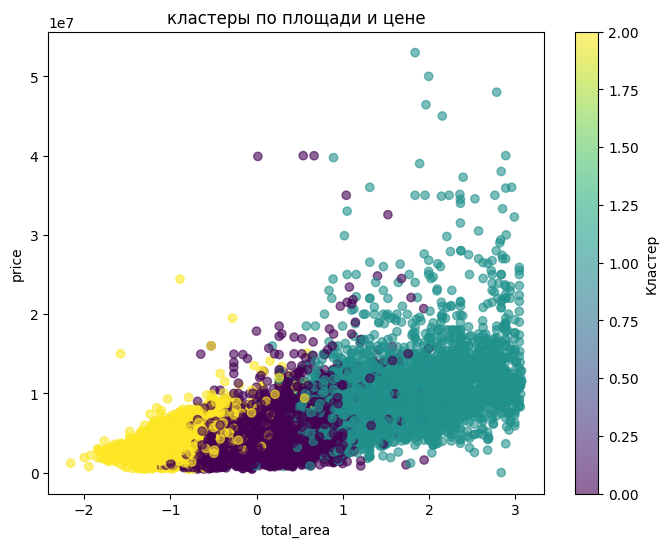

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(df['total_area'], df['price'], c=df['cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('total_area')
plt.ylabel('price')
plt.title('кластеры по площади и цене')
plt.colorbar(label='Кластер')
plt.show()

Разделим данные на кластеры и построим регрессию для каждого

In [ ]:
for cluster_id, group_data in df.groupby('cluster'):
    print(f"Кластер {cluster_id} - regression summary:")
    X_group = group_data[['total_area', 'rooms', 'floors_total', 'living_area', 'floor', 'kitchen_area']]
    y_group = group_data['price']
    X_group = sm.add_constant(X_group)
    model = sm.OLS(y_group, X_group).fit()
    print(model.summary())
    print("\n")

Кластер 0 - regression summary:
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     712.0
Date:                Tue, 25 Feb 2025   Prob (F-statistic):               0.00
Time:                        20:32:10   Log-Likelihood:            -1.5667e+05
No. Observations:                9870   AIC:                         3.133e+05
Df Residuals:                    9863   BIC:                         3.134e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         5.

**В 0 кластере R-squared = 0.302.**

total_area оказывает значительное влияние на цену.

rooms негативно влияет на цену (чем меньше комнат, тем дешевле квартира)

floors_total, floor и kitchen_area положительно влияет на цену.

**В 1 кластере R-squared = 0.291**

total_area значительное влияние на цену

rooms оказывает негативное влияние на цену.

living_area, kitchen_area положительно влияет на цену.

floors_total и floor незначимы


**Во 2 кластере R-squared = 0.378**

total_area имеет большое влияние на цену.

rooms негативно влияет на цену.

floors_total оказывает негативное влияние на цену.

floor положительно влияет на цену.

kitchen_area влияет на цену

